# **Request to PUNK IPA API**

In [56]:
# import libraries here

import requests
import pandas as pd
import json

# your code here
PUNKIPA = 'https://api.punkapi.com/v2/beers'

response = requests.get(PUNKIPA)
beer = response.json()
#print(json.dumps(beer[0], indent=6))   
beer_df = pd.DataFrame(beer)
newbeer = beer_df[['name','abv','tagline','srm','ebc','food_pairing','ingredients','ph','method']]

newbeer.head() 

,name,abv,tagline,srm,ebc,food_pairing,ingredients,ph,method
0,Buzz,4.5,A Real Bitter Experience.,10.0,20.0,"[Spicy chicken tikka masala, Grilled chicken q...","{'malt': [{'name': 'Maris Otter Extra Pale', '...",4.4,"{'mash_temp': [{'temp': {'value': 64, 'unit': ..."
1,Trashy Blonde,4.1,You Know You Shouldn't,15.0,15.0,"[Fresh crab with lemon, Garlic butter dipping ...","{'malt': [{'name': 'Maris Otter Extra Pale', '...",4.4,"{'mash_temp': [{'temp': {'value': 69, 'unit': ..."
2,Berliner Weisse With Yuzu - B-Sides,4.2,Japanese Citrus Berliner Weisse.,4.0,8.0,"[Smoked chicken wings, Miso ramen, Yuzu cheese...","{'malt': [{'name': 'Propino Pale Malt', 'amoun...",3.2,"{'mash_temp': [{'temp': {'value': 60, 'unit': ..."
3,Pilsen Lager,6.3,Unleash the Yeast Series.,15.0,30.0,"[Spicy crab cakes, Spicy cucumber and carrot T...","{'malt': [{'name': 'Extra Pale', 'amount': {'v...",4.4,"{'mash_temp': [{'temp': {'value': 65, 'unit': ..."
4,Avery Brown Dredge,7.2,Bloggers' Imperial Pilsner.,5.0,10.0,"[Vietnamese squid salad, Chargrilled corn on t...","{'malt': [{'name': 'Lager Malt', 'amount': {'v...",4.4,"{'mash_temp': [{'temp': {'value': 66, 'unit': ..."


In [37]:
newbeer['method'].iloc[0]

{'mash_temp': [{'temp': {'value': 64, 'unit': 'celsius'}, 'duration': 75}],
 'fermentation': {'temp': {'value': 19, 'unit': 'celsius'}},
 'twist': None}

In [43]:
newbeer['food_pairing'] = newbeer['food_pairing'].apply(lambda x: ','.join(x))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
newbeer['food_pairing'].value_counts()

Blue cheese beef burger,Glazed short ribs,Chocolate cake                                                          1
Poached sole fillet with capers,Summer fruit salad,Banana split                                                   1
Coffee dusted venison loin,Memphis-style beef short ribs,Chocolate orange brownies                                1
Grilled portabello mushroom burger,Chicken sausages with creamy mash,Caramel and banana meringue pie              1
Warm blackberry pie,Vinegar doused fish and chips,Aromatic korma curry with lemon and garlic naan                 1
Roasted wood pigeon with black pudding,Pan seared venison fillet with juniper sauce,Apricot coconut cake          1
Stilton on gingerbread biscuits,Pot roasted artichokes,Lamb chops with caramelised figs                           1
Smoked chicken wings,Miso ramen,Yuzu cheesecake                                                                   1
Vietnamese squid salad,Chargrilled corn on the cob with paprika butter,S

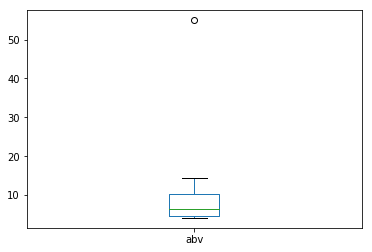

In [54]:
newbeer['abv'].plot(kind='box')